In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv('1.01.+Simple+linear+regression.csv')

In [3]:

data


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [5]:
x = data['SAT']
y = data['GPA']


In [6]:
x.shape

(84,)

In [7]:
y.shape

(84,)

In [8]:
x_matrix = x.values.reshape(-1,1)

In [9]:
x_matrix.shape

(84, 1)

In [10]:
y_matrix = y.values.reshape(-1,1)
y_matrix.shape

(84, 1)

In [11]:
#Reggression

In [12]:
reg = LinearRegression()

In [13]:
reg.fit(x_matrix,y_matrix)

LinearRegression()

In [14]:
#R-squared using sklearn

In [15]:
reg.score(x_matrix,y_matrix)

0.40600391479679765

In [16]:
#coefficient


In [17]:
reg.coef_

array([[0.00165569]])

In [18]:
reg.intercept_


array([0.2750403])

In [19]:
reg.predict([[1740]])

array([[3.15593751]])

In [20]:
new_data = pd.DataFrame(data = [1740,1760], columns = ['SAT'])

In [21]:
new_data

,SAT
0,1740
1,1760


In [22]:
reg.predict(new_data)

C:\Users\bisho\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[3.15593751],
       [3.18905127]])

In [23]:
new_data['Predicted_GPA'] = reg.predict(new_data)

C:\Users\bisho\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [24]:
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


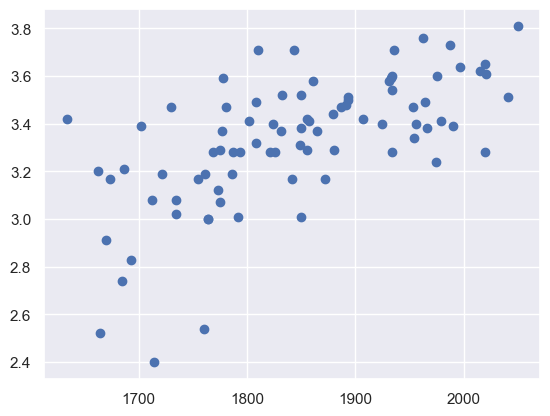

In [25]:
plt.scatter(x,y)

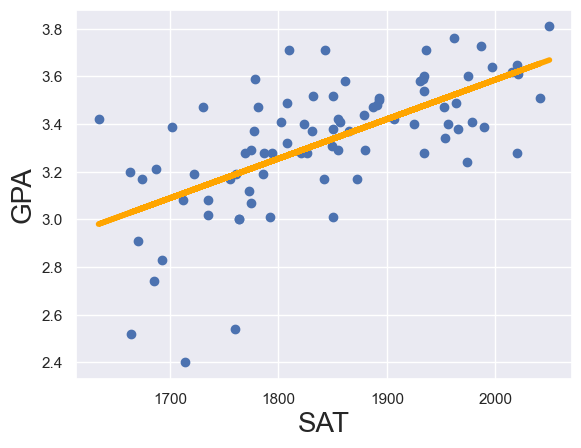

In [26]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x,yhat,lw = 4, c= 'orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [27]:
#multiple linear regression 


In [28]:
data = pd.read_csv('1.02.+Multiple+linear+regression.csv')

In [29]:
data

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [30]:
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [31]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [32]:
x = data[['SAT', 'Rand 1,2,3']]

In [33]:
y = data['GPA']

In [34]:
reg = LinearRegression()

In [35]:
reg.fit(x,y)

LinearRegression()

In [36]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [37]:
reg.intercept_

0.29603261264909486

In [38]:
#calculating the r-squared for multiple regression 

In [39]:
reg.score(x,y)

0.40668119528142843

In [40]:
#adjusted r-squared

formula  for adjusted rsquared

In [41]:
x.shape

(84, 2)

In [42]:
r2 = reg.score(x,y)
n= x.shape[0]
p= x.shape[1]

In [43]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [44]:
adjusted_r2

0.39203134825134023

f regression


In [45]:
from sklearn.feature_selection import f_regression

In [46]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [47]:
p_values = f_regression(x,y)[1]

In [48]:
p_values

array([7.19951844e-11, 6.76291372e-01])

In [49]:
p_values.round(3)

array([0.   , 0.676])

In [50]:
#hence the rand 1,2 ,3 is no use 

Creating summary table


In [51]:
reg_summary = pd.DataFrame(data = x.columns.values, columns = ['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [52]:
reg_summary ['Coefficient'] = reg.coef_

In [53]:
reg_summary

,Features,Coefficient
0,SAT,0.001654
1,"Rand 1,2,3",-0.008270


In [54]:
reg_summary['p_values'] = p_values.round(3)

In [55]:
reg_summary

,Features,Coefficient,p_values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


Standerdization


In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
scaler.fit(x)

StandardScaler()

In [59]:
x_scaled = scaler.transform(x)

In [60]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

In [61]:
reg = LinearRegression()
reg.fit(x_scaled,y)

LinearRegression()

In [62]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [63]:
reg.intercept_

3.330238095238095

creating summary table


In [64]:
reg_summary = pd.DataFrame([['Bias'], ['SAT'],['Rand 1,2,3']], columns = ['Features'])

In [65]:
reg_summary['Weights'] = reg.intercept_ , reg.coef_[0] , reg.coef_[1]

In [66]:
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


Predecting


In [67]:
new_data = pd.DataFrame(data = [[1700,2],[1800,1]], columns = ['SAT','Rand 1,2,3'])

In [69]:
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [70]:
reg.predict(new_data)

C:\Users\bisho\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([295.39979563, 312.58821497])

In [71]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [72]:
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

what if we removed the Rand 1,2 ,3 feature

In [73]:
reg_simple = LinearRegression()

In [82]:
x_simple = x_scaled[:,0]

In [84]:
x_simple = x_simple.reshape(-1,1)

In [85]:
reg_simple.fit(x_simple,y)

LinearRegression()

In [88]:
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])

In [89]:
new_data_scaled[:,0]

array([-1.39811928, -0.43571643])